# Predicting Churn for Bank Customers

## Importing libraries and dataset

In [381]:
# Importing required libraries
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [356]:
# Importing dataset as a dataframe
df = pd.read_csv('dataset/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Exploring Data

In [357]:
# Removing unnecessary columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [358]:
# Label encoding Gender
df['Gender'] = df['Gender'].replace({'Male': 0, 'Female': 1})
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,0,39,5,0.00,2,1,0,96270.64,0
9996,516,France,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,1,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,0,42,3,75075.31,2,1,0,92888.52,1


In [359]:
# Determine the number of unique values in Geography column
print(f"Number of different countries = {df['Geography'].nunique()}")

Number of different countries = 3


In [360]:
# Label encoding Geography
df['Geography'] = df['Geography'].replace({'France': 0, 'Germany': 1, 'Spain': 2})
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,0,39,5,0.00,2,1,0,96270.64,0
9996,516,0,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,1,36,7,0.00,1,0,1,42085.58,1
9998,772,1,0,42,3,75075.31,2,1,0,92888.52,1


In [361]:
# Checking for null values
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Since no null values exist we do not need to drop any rows

### Visualizing the data

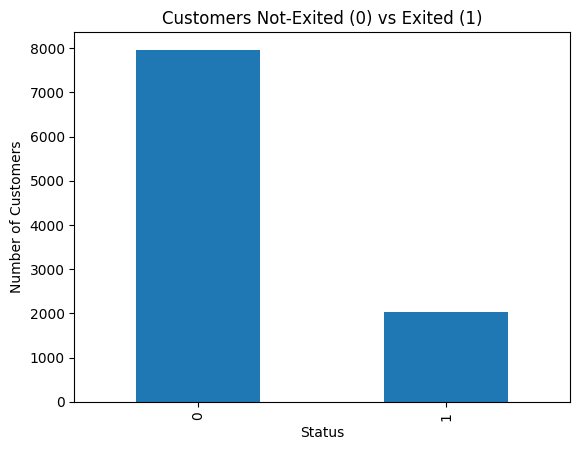

In [362]:
# Count number of exited and non-exited
exited_counts = df['Exited'].value_counts()

# Create bar plot
exited_counts.plot(kind='bar')
plt.title('Customers Not-Exited (0) vs Exited (1)')
plt.xlabel('Status')
plt.ylabel('Number of Customers')
plt.show()

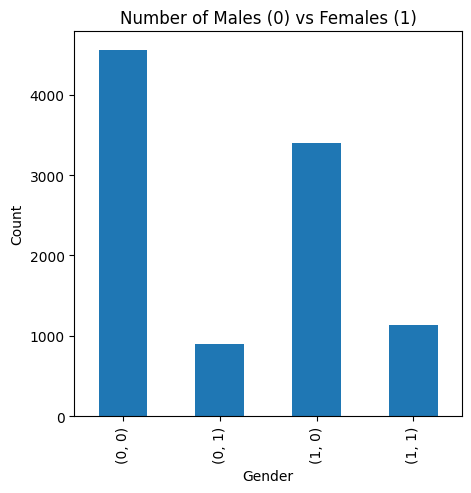

In [363]:
# Count the number of males and females
gender_counts = df.groupby('Gender')['Exited'].value_counts()

# Create a bar plot
gender_counts.plot(kind='bar', figsize=(5, 5))
plt.title('Number of Males (0) vs Females (1)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

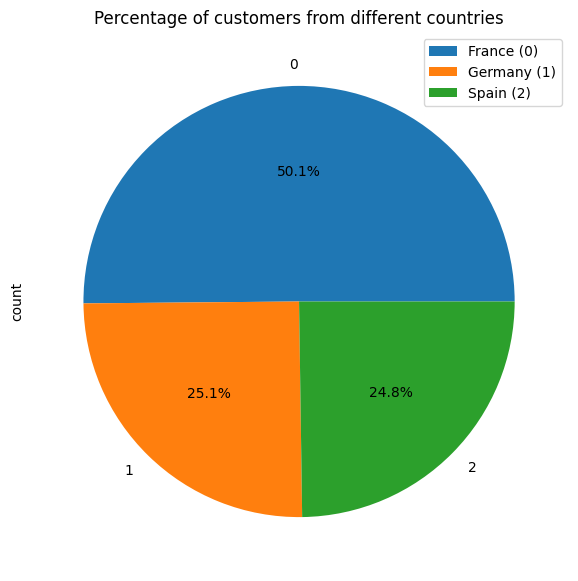

In [364]:
# Visualizing the percentage of customers from different countries
country_counts = df['Geography'].value_counts()
country_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(7, 7))
plt.title('Percentage of customers from different countries')
plt.legend(['France (0)', 'Germany (1)', 'Spain (2)'])
plt.show()

Gender
0    16.455928
1    25.071539
Name: Exited, dtype: float64


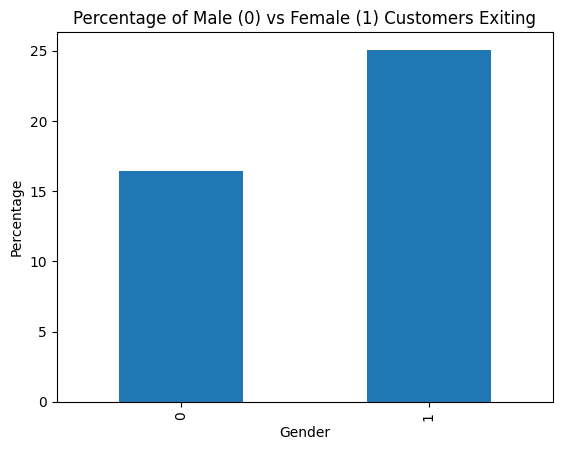

In [365]:
# Comparing percentage of male exiting vs female exiting
# create a new dataframe with only the rows where the customer has exited
exited_df = df[df['Exited'] == 1]

# group the data by gender and calculate the percentage of males and females that have exited
gender_exit_percentages = exited_df.groupby('Gender')['Exited'].count() / df.groupby('Gender')['Exited'].count() * 100
print(gender_exit_percentages)

# create a bar graph to visualize the results
gender_exit_percentages.plot(kind='bar')
plt.title('Percentage of Male (0) vs Female (1) Customers Exiting')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.show()


## Scaling data

In [366]:
# Importing cleaned dataset as a numpy array
dataset = df.values
dataset.dtype, dataset.shape

(dtype('float64'), (10000, 11))

In [367]:
# Splitting dataset into features and labels
X = dataset[:, :-1]
y = dataset[:, -1]
print(f"X = {X}")
print(f"y = {y}")
print(f"X.shape = {X.shape}")
print(f"y.shape = {y.shape}")

X = [[6.1900000e+02 0.0000000e+00 1.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [6.0800000e+02 2.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [5.0200000e+02 0.0000000e+00 1.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [7.0900000e+02 0.0000000e+00 1.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [7.7200000e+02 1.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 9.2888520e+04]
 [7.9200000e+02 0.0000000e+00 1.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 3.8190780e+04]]
y = [1. 0. 1. ... 1. 1. 0.]
X.shape = (10000, 10)
y.shape = (10000,)


In [394]:
# Splitting dataset into training and testing sets
# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables.
X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
X_cv, X_test, y_cv, y_test = train_test_split(X_, y_, test_size=0.50, random_state=1)

# Delete temporary variables
del X_, y_

In [395]:
# Shapes of training and testing sets
print(f"Shape of X_train = {X_train.shape}")
print(f"Shape of y_train = {y_train.shape}")
print(f"Shape of X_cv = {X_cv.shape}")
print(f"Shape of y_cv = {y_cv.shape}")
print(f"Shape of X_test = {X_test.shape}")
print(f"Shape of y_test = {y_test.shape}")

Shape of X_train = (6000, 10)
Shape of y_train = (6000,)
Shape of X_cv = (2000, 10)
Shape of y_cv = (2000,)
Shape of X_test = (2000, 10)
Shape of y_test = (2000,)


In [396]:
# Create scaler
scaler_linear = StandardScaler()

# Scaling training and testing sets
X_train_scaled = scaler_linear.fit_transform(X_train)
X_cv_scaled = scaler_linear.transform(X_cv)
X_test_scaled = scaler_linear.transform(X_test)

## Model 

In [412]:
# Initialize the lists that will contain the errors for each model
train_errors = []
cv_errors = []

# Build the models
logistic_regression = LogisticRegression()
sgd_classifier = SGDClassifier()
svm_classifier = svm.SVC()
knn_classifier = KNeighborsClassifier(n_neighbors=100)
decision_tree_classifier = DecisionTreeClassifier()
random_forest_classifier = RandomForestClassifier()

models = [
    logistic_regression,
    sgd_classifier,
    svm_classifier,
    knn_classifier,
    decision_tree_classifier,
    random_forest_classifier
]

In [413]:
# Loop over each model
for model in models:
    print(f"Training {model.__class__.__name__}...")
    model.fit(X_train_scaled, y_train)
    print("Done.\n")

    # Record the fraction of misclassified examples for the training set
    yhat = model.predict(X_train_scaled)
    train_error = np.mean(yhat != y_train)
    train_errors.append(train_error)

    # Record the fraction of misclassified examples for the cross validation set
    yhat = model.predict(X_cv_scaled)
    cv_error = np.mean(yhat != y_cv)
    cv_errors.append(cv_error)

for model_num in range(len(train_errors)):
    print(
        f"Model {model_num + 1} {models[model_num].__class__.__name__}: Training error = {train_errors[model_num]}, Cross validation error = {cv_errors[model_num]}"
    )

Training LogisticRegression...
Done.

Training SGDClassifier...
Done.

Training SVC...
Done.

Training KNeighborsClassifier...
Done.

Training DecisionTreeClassifier...
Done.

Training RandomForestClassifier...
Done.

Model 1 LogisticRegression: Training error = 0.18966666666666668, Cross validation error = 0.195
Model 2 SGDClassifier: Training error = 0.19916666666666666, Cross validation error = 0.2105
Model 3 SVC: Training error = 0.13316666666666666, Cross validation error = 0.1445
Model 4 KNeighborsClassifier: Training error = 0.18016666666666667, Cross validation error = 0.1875
Model 5 DecisionTreeClassifier: Training error = 0.0, Cross validation error = 0.218
Model 6 RandomForestClassifier: Training error = 0.0, Cross validation error = 0.1415


In [414]:
for model in models:
    print(f"{model.__class__.__name__} accuracy = {model.score(X_test_scaled, y_test)}")

LogisticRegression accuracy = 0.8085
SGDClassifier accuracy = 0.7905
SVC accuracy = 0.8545
KNeighborsClassifier accuracy = 0.812
DecisionTreeClassifier accuracy = 0.7795
RandomForestClassifier accuracy = 0.857
